In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [161]:
data = pd.read_excel('e-comerce.xlsx')

In [162]:
data.head()

,factura,sucursal,ciudad,tipo usuario,genero,categoria,costos,venta total,fecha,hora,tipo de pago,revision
0,750-67-8428,A,Nueva York,Member,Female,Health and beauty,522.83,5489715.00,2019-05-01 00:00:00,13:08:00,Ewallet,9.1
1,226-31-3081,C,Houston,Normal,Female,Electronic accessories,76.40,80.22,2019-08-03 00:00:00,10:29:00,Cash,9.6
2,631-41-3108,A,Nueva York,Normal,Male,Home and lifestyle,324.31,3405255.00,2019-03-03 00:00:00,13:23:00,Credit card,7.4
3,123-19-1176,A,Nueva York,Member,Male,Health and beauty,465.76,489048.00,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,A,Nueva York,Normal,Male,Sports and travel,604.17,6343785.00,2019-08-02 00:00:00,10:37:00,Ewallet,5.3


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   factura       1000 non-null   object 
 1   sucursal      1000 non-null   object 
 2   ciudad        1000 non-null   object 
 3   tipo usuario  1000 non-null   object 
 4   genero        1000 non-null   object 
 5   categoria     1000 non-null   object 
 6   costos        1000 non-null   float64
 7   venta total   1000 non-null   float64
 8   fecha         1000 non-null   object 
 9   hora          1000 non-null   object 
 10  tipo de pago  1000 non-null   object 
 11  revision      1000 non-null   float64
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [164]:
# combierto la columna fecha en datetime
data['fecha'] = pd.to_datetime(data['fecha'],errors = 'coerce')

# ventas por sucursal

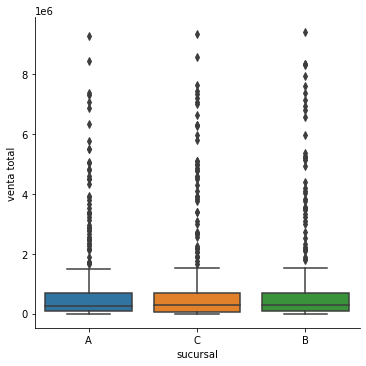

In [165]:
sns.catplot(x="sucursal", y="venta total", kind="box", data=data)

# ventas por sucursal y genero

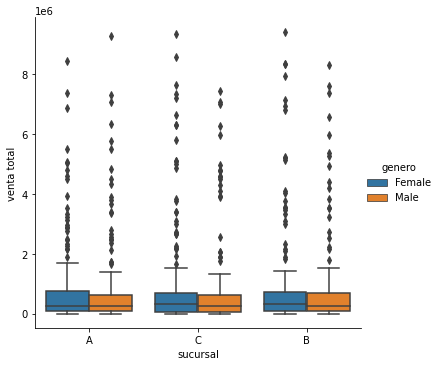

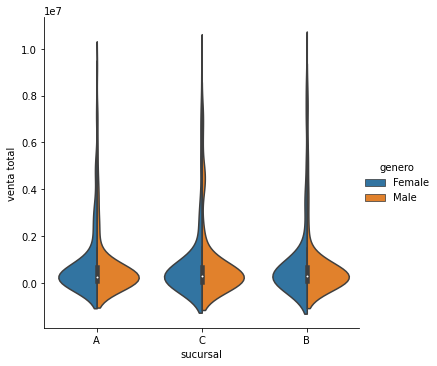

In [166]:
sns.catplot(x="sucursal", y="venta total", hue="genero", kind="box", data=data)
sns.catplot(x="sucursal", y="venta total", hue="genero",
            kind="violin", split=True, data=data)

el comportamiento de ventas entre las tres sucursales es muy silimar, de igual manera pasa con el comportamiento de compra de los clientes entre las tres sucursales.

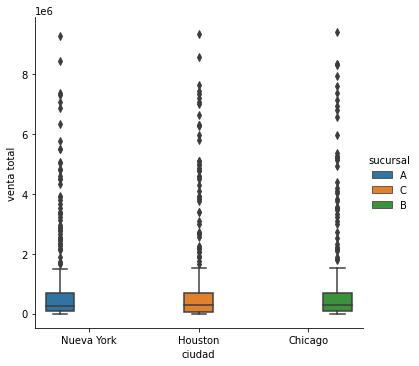

In [167]:
sns.catplot(x="ciudad", y="venta total", hue = 'sucursal', kind="box", data=data)

aqui puedo ver que cada sucursal pertenece a una ciudad

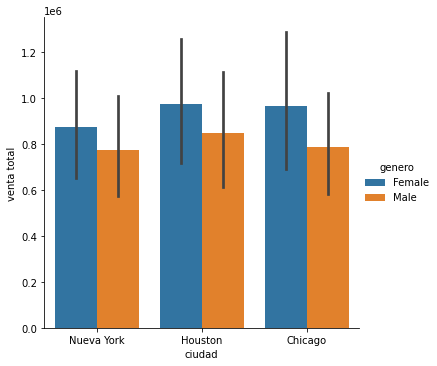

In [168]:
sns.catplot(x="ciudad", y="venta total", hue="genero", kind="bar", data=data)

las mujeres compran mas que los hombres

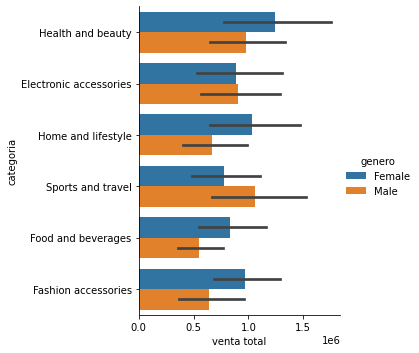

In [169]:
sns.catplot(y="categoria", x="venta total", hue="genero", kind="bar", data=data)

dependiendo de la categoria los hombres compran mas que las mujeres, en sports and travel los hombres son los mejores clientes.


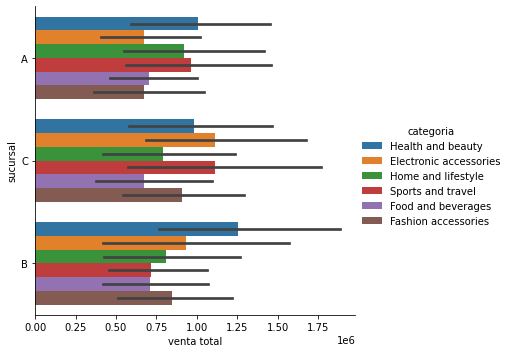

In [170]:
sns.catplot(y="sucursal", x="venta total", hue="categoria", kind="bar", data=data)

las tres sucursales tienen el mismo comportamienti en ventas pero no con las categorias que venden.

# exploro las fechas

In [171]:
data['fecha'] = data['fecha'].dt.month

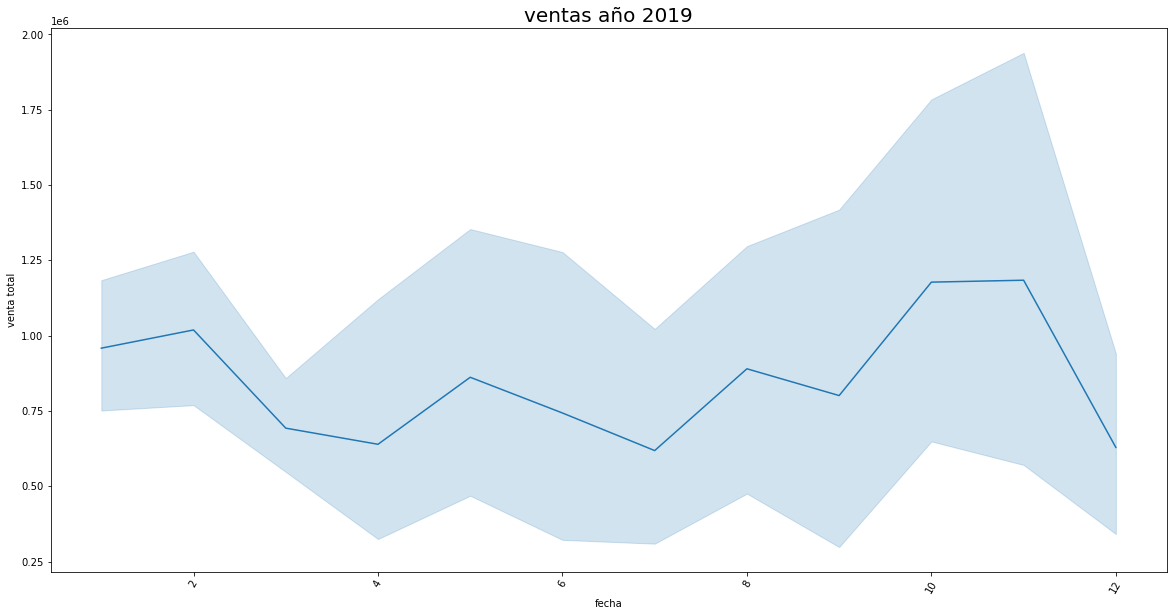

In [172]:
plot_no = 1
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = data, x = 'fecha',y = 'venta total')
_ = plt.title('ventas año 2019', fontsize=20)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

las mejores ventas estuvieron iniciando el 2019 pero el pico mas alto es finalizando el año

# exploro que generos fueron los mejores clientes en el transcurso del año

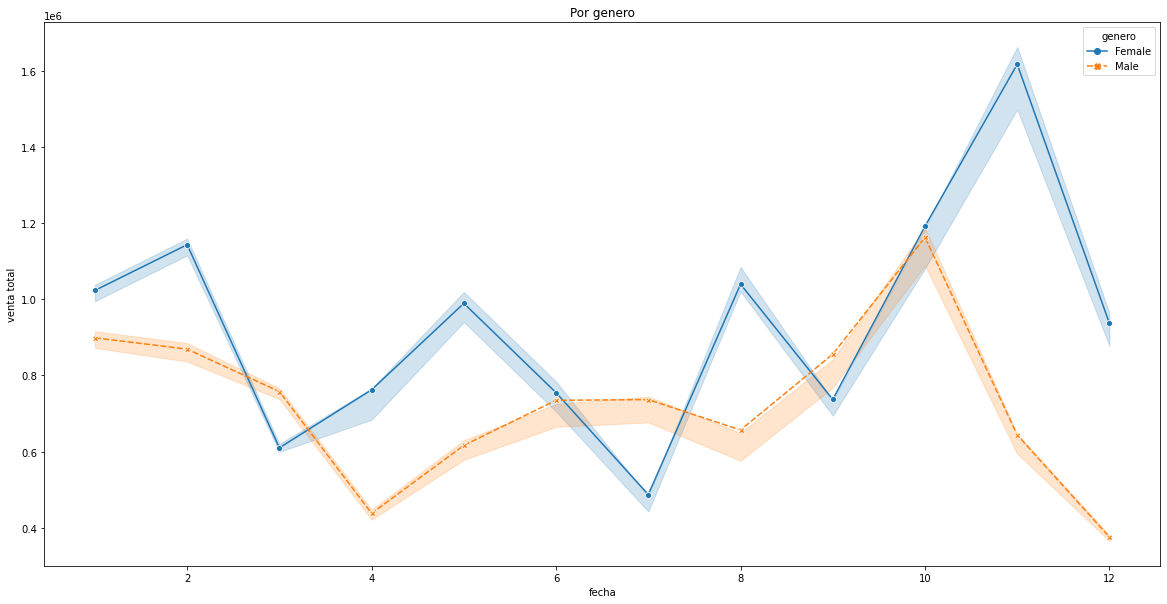

In [173]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = data, x = 'fecha', y = 'venta total', hue = 'genero',style = 'genero', markers = True, ci = 10)
_ = plt.title('Por genero')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

las mujeres fueron los mejores clientes

# ahora por sucursal

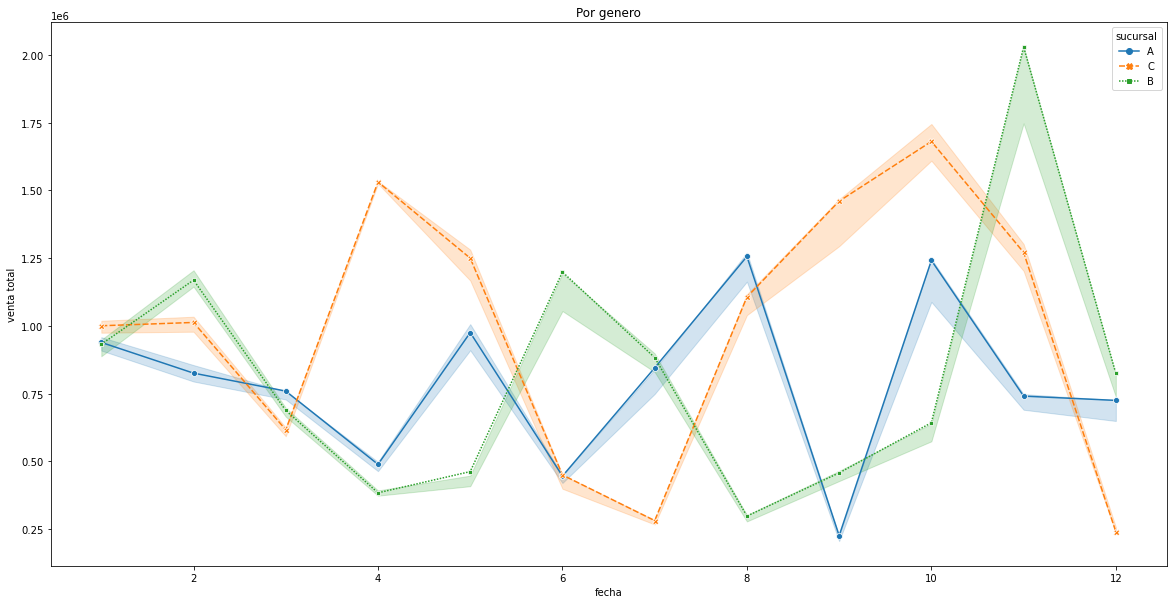

In [174]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = data, x = 'fecha', y = 'venta total', hue = 'sucursal',style = 'sucursal', markers = True, ci = 10)
_ = plt.title('Por genero')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

la sucursal c es la que tiene los picos mas altos pero tambien es la que tiene bajos, se podria decir que la sucursal b puede que sea la que mejor se desempeño en ventas.

# ahora exploro por categoria

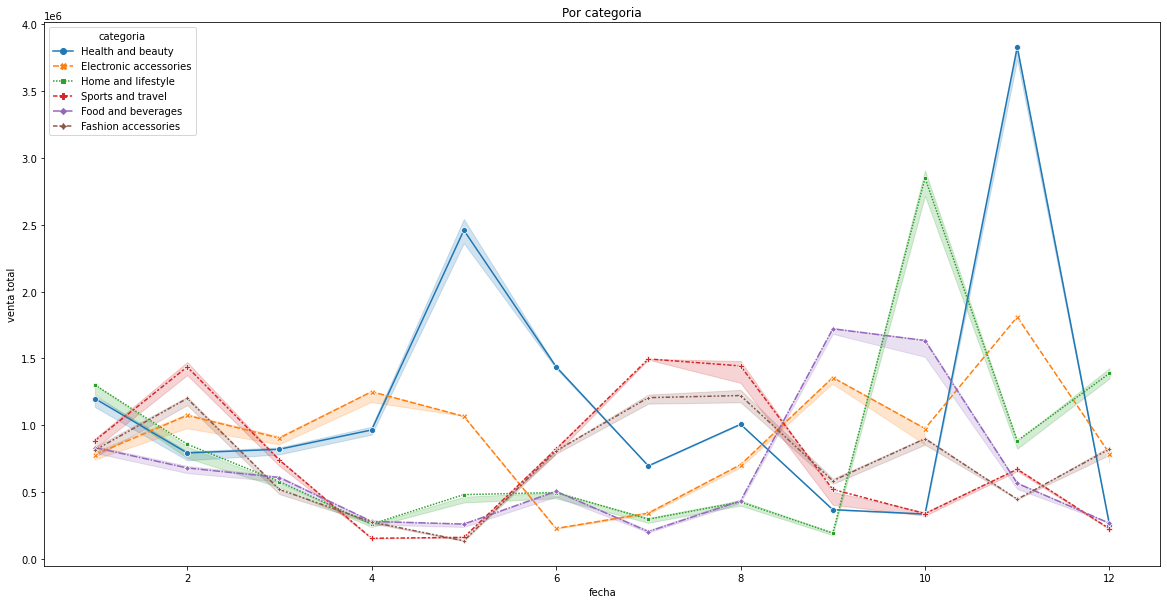

In [175]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = data, x = 'fecha', y = 'venta total', hue = 'categoria',style = 'categoria', markers = True, ci = 10)
_ = plt.title('Por categoria')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

la categoria mejor en ventas es heatlh and beauty y la peor fue food and veberages

# quiero explorar que tipo de usuario es el que mas compra

<AxesSubplot:xlabel='count', ylabel='tipo usuario'>

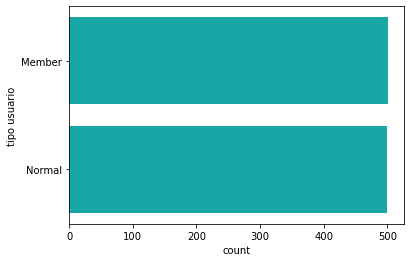

In [176]:
sns.countplot(y="tipo usuario", data=data, color="c")

In [177]:
data.groupby('tipo usuario')['tipo usuario'].count()

tipo usuario
Member    501
Normal    499
Name: tipo usuario, dtype: int64

<AxesSubplot:xlabel='sucursal', ylabel='Count'>

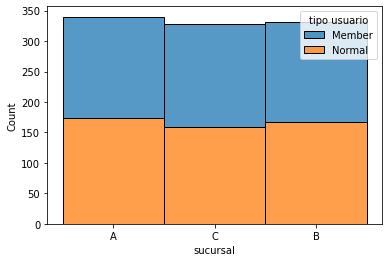

In [178]:
sns.histplot(data=data, x="sucursal", hue="tipo usuario", multiple="stack")

<AxesSubplot:xlabel='Count', ylabel='categoria'>

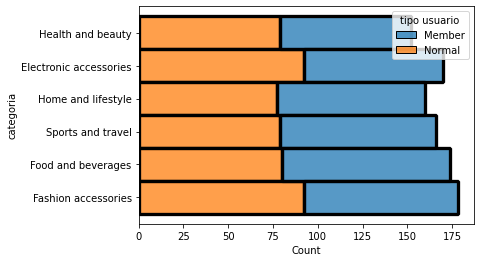

In [179]:
sns.histplot(data=data, y="categoria", hue="tipo usuario", multiple="stack")

<AxesSubplot:xlabel='genero', ylabel='Count'>

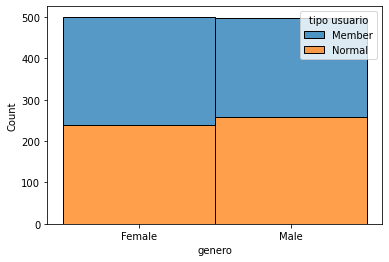

In [180]:
sns.histplot(data=data, x="genero", hue="tipo usuario", multiple="stack")

la distribucion de tipo de usuario esta dividido casi en la mitad a nivel de categorias, sucursales y hasta con el genero

# ahora quiero ver que tan rentable es el negocio

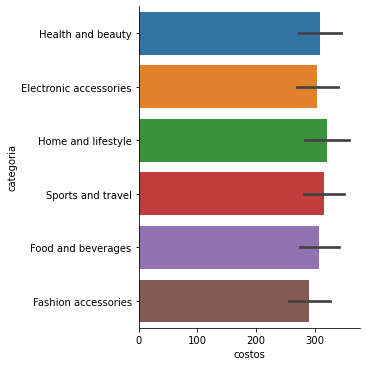

In [181]:
sns.catplot(y="categoria", x="costos", kind="bar", data=data)

<AxesSubplot:xlabel='costos', ylabel='categoria'>

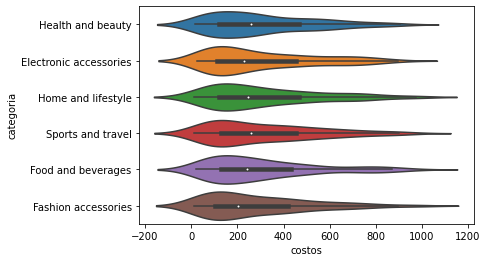

In [182]:
sns.violinplot(x=data.costos, y=data.categoria)

los costos entre categorias son muy similares

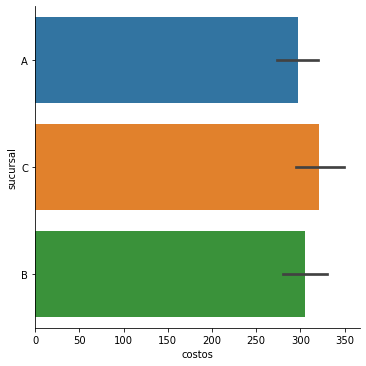

In [183]:
sns.catplot(y="sucursal", x="costos", kind="bar", data=data)

<AxesSubplot:xlabel='sucursal', ylabel='costos'>

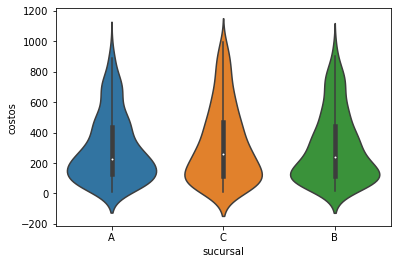

In [184]:
sns.violinplot(x=data.sucursal, y=data.costos)

tampoco hay mucha diferencia costos y sucursal el comportamiento es muy similar

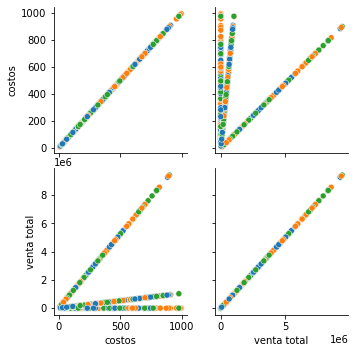

In [185]:
g = sns.PairGrid(data, vars=["costos", "venta total"], hue="sucursal")
g.map(sns.scatterplot)

si existe una correlacion entre costos y venta total

In [186]:
data[data['costos']>= data['venta total']]

,factura,sucursal,ciudad,tipo usuario,genero,categoria,costos,venta total,fecha,hora,tipo de pago,revision


no existen registros de costos que sea mayores o iguales a las ventas

In [187]:
data.groupby('sucursal')['venta total'].sum() - data.groupby('sucursal')['costos'].sum()

sucursal
A    2.793787e+08
B    2.904553e+08
C    3.010723e+08
dtype: float64

la sucursal que mas genera ganacias es la C

In [188]:
data['venta total'].sum() - data['costos'].sum()

870906305.68

el total en ganancias

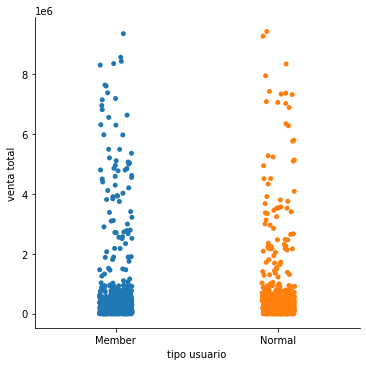

In [189]:
sns.catplot(x="tipo usuario", y="venta total", data=data)

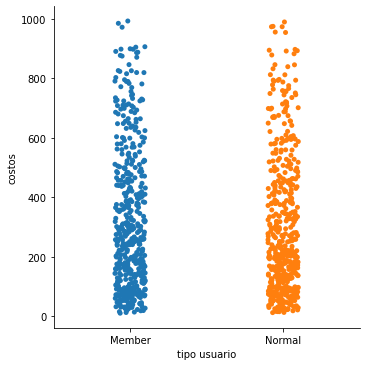

In [190]:
sns.catplot(x="tipo usuario", y="costos", data=data)

la distribucion entre los tipos de usuario es muy similar

# veamos si depronto con machine learning podemos identificar los tipos de usuarios sin una etiqueta.

preparo los datos para el modelo

In [191]:
# agrego las variables que mas me aportan informacion para la prediccion
new_data = data[['categoria','costos','venta total','tipo de pago','revision','tipo usuario']]

In [192]:
new_data

,categoria,costos,venta total,tipo de pago,revision,tipo usuario
0,Health and beauty,522.83,5489715.00,Ewallet,9.1,Member
1,Electronic accessories,76.40,80.22,Cash,9.6,Normal
2,Home and lifestyle,324.31,3405255.00,Credit card,7.4,Normal
3,Health and beauty,465.76,489048.00,Ewallet,8.4,Member
4,Sports and travel,604.17,6343785.00,Ewallet,5.3,Normal
...,...,...,...,...,...,...
995,Health and beauty,40.35,423675.00,Ewallet,6.2,Normal
996,Home and lifestyle,973.80,1022.49,Ewallet,4.4,Normal
997,Food and beverages,31.84,33432.00,Cash,7.7,Member
998,Home and lifestyle,65.82,69111.00,Cash,4.1,Normal


In [195]:
new_data['categoria'] = new_data['categoria'].replace({'Health and beauty':1,'Electronic accessories':2,
                                                    'Home and lifestyle':3,'Sports and travel':4,
                                                    'Food and beverages':5,'Fashion accessories':6})

In [196]:
new_data['tipo de pago'] = new_data['tipo de pago'].replace({'Ewallet':1,'Cash':2,'Credit card':3})

In [197]:
new_data['tipo usuario'] = new_data['tipo usuario'].replace({'Member':1,'Normal':2})

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

intento probar con los algoritmos de clasificación que conozco para ver cual me puede dar el mejor score usando bagging.

In [202]:
x = new_data.drop(['tipo usuario'], axis=1)
y = new_data['tipo usuario']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)


estimators = {
       'LogisticRegression' : LogisticRegression(),
        'SVC' : SVC(),
        'LinearSVC' : LinearSVC(),
        'SGD' : SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
        'KNN' : KNeighborsClassifier(),
        'DecisionTreeClf' : DecisionTreeClassifier(),
        'RandomTreeForest' : RandomForestClassifier(random_state=0)
    }

for name, estimator in estimators.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=50).fit(x_train, y_train)
    bag_predict = bag_class.predict(x_test)
    print('='*64)
    print('SCORE con {} : {}'.format(name, accuracy_score(bag_predict, y_test)))

SCORE con LogisticRegression : 0.5228571428571429
SCORE con SVC : 0.4857142857142857
SCORE con LinearSVC : 0.47714285714285715
SCORE con SGD : 0.4657142857142857
SCORE con KNN : 0.5428571428571428
SCORE con DecisionTreeClf : 0.5371428571428571
SCORE con RandomTreeForest : 0.5285714285714286


el score o precisión de los clasificadores no es muy alto, el que mejor se desempeño fue el KNeighborsClassifier. la precision no es cofiable ya que no hay una variable o feature que nos aporte informacion o que le ayude al algoritmo al clasificar quienes son los clientes member o normal.

se identifico en las graficas anteriores que el comportamiento de los clientes es muy similar en todas las sucursales, tambien se identifico que no hay mucha diferencia entre el comportamiento de compra de los hombres y las mujeres lo mismo pasa con los tipos de usuario no hay una notoria diferencia entre este tipo de clientes.

si le agrego mas variables al los clasificadores esto generaria mas ruido y perjudicaria la presicion del algoritmo
pero por el momento ningun clafificador me da la confianza para determinar que con nuevos datos que tipo de cliente o de usuario me puede clasificar,  pero esto no se trata de el desempeño del algoritmo si no de la calidad de los datos y lo que estos nos pueden aportar.